In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from metropolis import *
from tools import *
from tqdm import *
import pickle
# auto reload
from scipy.interpolate import CubicSpline
%load_ext autoreload
%autoreload 2 

import ipywidgets as widgets
from IPython.display import display
from tkinter import Tk, filedialog
import os

def select_files(b):
    root = Tk()
    root.withdraw()
    root.call('wm', 'attributes', '.', '-topmost', True)
    # Enable multiple file selection and set the initial directory
    filepaths = filedialog.askopenfilenames(initialdir="../Data/")
    root.destroy()
    # Extract filenames from the full paths and store them in a list
    filenames = [os.path.basename(filepath) for filepath in filepaths]
    print("Selected files:", filenames)
    b.filenames = filenames  # Store filenames in the button for further use if needed

fileselect = widgets.Button(description="Select Files")
fileselect.on_click(select_files)

### Create default grid

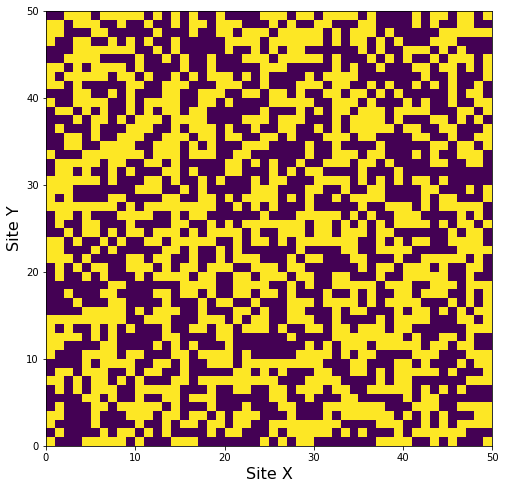

In [2]:
grid = np.random.choice([-1, 1], size=(50, 50))

plt.figure(figsize=(8, 8))
plt.pcolormesh(grid, cmap='viridis')
# plt.colorbar(label='Spin')
plt.xlabel('Site X',fontsize=16)
plt.ylabel('Site Y',fontsize=16)
plt.show()


In [3]:
index=2
pickle.dump(grid, open(f"../default_grid/default_grid_{index}.pkl", "wb"))

### Load data file

In [4]:
display(fileselect)

Button(description='Select Files', style=ButtonStyle())

Selected files: ['Ising_size_500x500_scanT_B_0.4_J_1.0_75.pkl', 'Ising_size_500x500_scanT_B_0.1_J_1.0_74.pkl', 'Ising_size_500x500_scanT_B_0.2_J_1.0_73.pkl', 'Ising_size_500x500_scanT_B_0.5_J_1.0_72.pkl', 'Ising_size_500x500_scanT_B_0.3_J_1.0_71.pkl']


In [6]:
# filename_lst =[
#     "Ising_size_100x100_scanT_B_0.025_J_1.0_31.pkl",
#     "Ising_size_100x100_scanT_B_0.03_J_1.0_32.pkl",
#     "Ising_size_100x100_scanT_B_0.035_J_1.0_33.pkl",
#     "Ising_size_100x100_scanT_B_0.04_J_1.0_34.pkl",
#     "Ising_size_100x100_scanT_B_0.045_J_1.0_35.pkl",
#     "Ising_size_100x100_scanT_B_0.05_J_1.0_36.pkl",
#     "Ising_size_100x100_scanT_B_0.055_J_1.0_37.pkl",
#     "Ising_size_100x100_scanT_B_0.06_J_1.0_38.pkl"
# ]
filename_lst = fileselect.filenames
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)
# filename = "Ising_size_100x100_scanT_B_0.01_J_1.0_15.pkl"
# data = pickle.load(open(f"../Data/"+filename, "rb"))

In [7]:
data.keys()

dict_keys(['param', 'avg_M', 'avg_E', 'avg_E2', 'Cv', 'final_grid'])

In [8]:
data["param"].keys()

dict_keys(['trail', 'B', 'J', 'grid', 'scan_which', 'scan'])

### See initial final grid

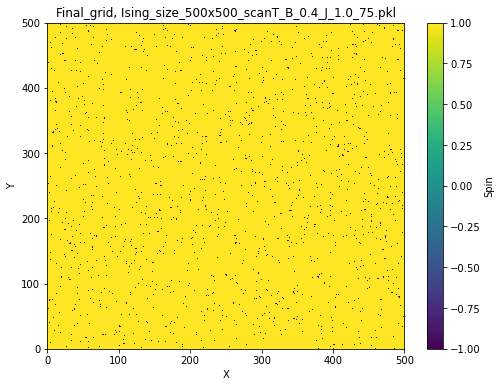

In [9]:
exp_interested = 0
data = data_lst[exp_interested]
filename = filename_lst[exp_interested]
interests = 6
# plt.figure(figsize=(8, 6))
# plt.pcolormesh(data["param"]["grid"], cmap='viridis')
# plt.colorbar(label='Spin')
# plt.title("Initial_grid, "+filename)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()
plt.figure(figsize=(8, 6))
# We have # of trail returned final grids!!!
plt.pcolormesh(data["final_grid"][interests], cmap='viridis')
plt.colorbar(label='Spin')
plt.title("Final_grid, "+filename)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# diff_grid = grid_difference(data["final_grid"][interests], data["param"]["grid"])
# plt.figure(figsize=(8, 6))
# plt.pcolormesh(diff_grid, cmap='viridis')
# plt.colorbar(label='Spin')
# plt.title("Difference between initial and final, "+filename)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

### Plot avg_M vs scan_variable

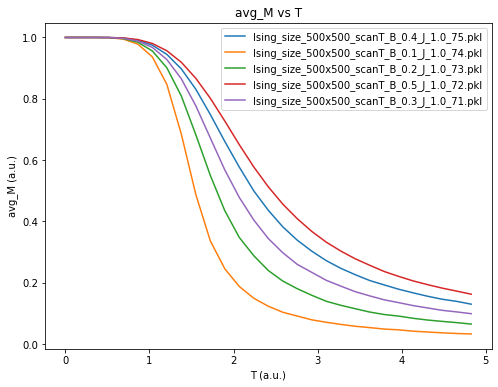

In [10]:
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][0:-1], data["avg_M"][0:-1], label=filename_lst[ii])
name= data["param"]["scan_which"]
plt.xlabel(f"{name} (a.u.)")
plt.ylabel("avg_M (a.u.)")
plt.title(f"avg_M vs {name}")
plt.legend()
plt.show()

### Plot mean E vs scan variable

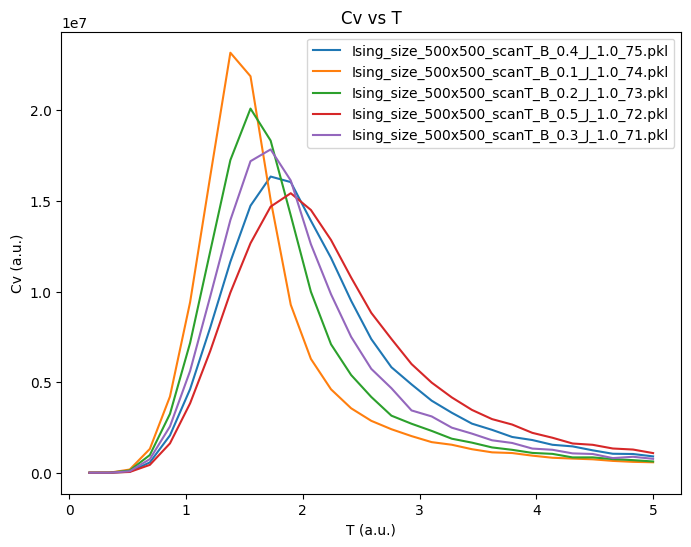

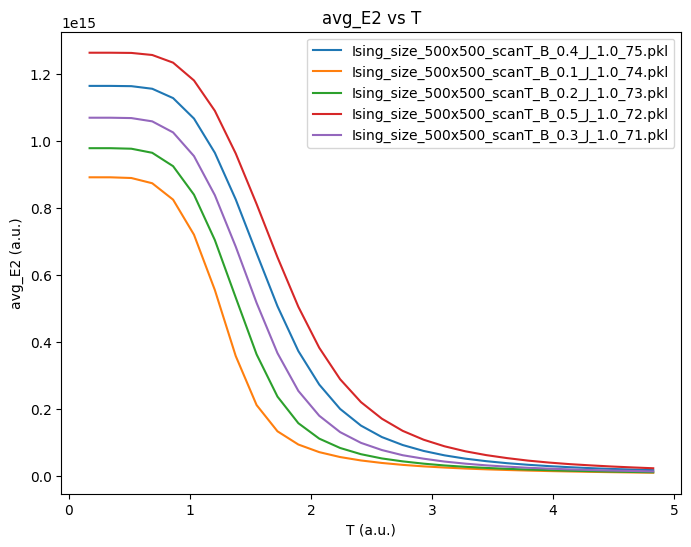

In [5]:
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][1:], np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2]), label=filename_lst[ii])
name= data["param"]["scan_which"]
plt.xlabel(f"{name} (a.u.)")
plt.ylabel("Cv (a.u.)")
plt.title(f"Cv vs {name}")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][1:-1], data["avg_E2"][1:-1], label=filename_lst[ii])
name= data["param"]["scan_which"]
plt.xlabel(f"{name} (a.u.)")
plt.ylabel("avg_E2 (a.u.)")
plt.title(f"avg_E2 vs {name}")
plt.legend()
plt.show()

### Plot Cv vs scan variable

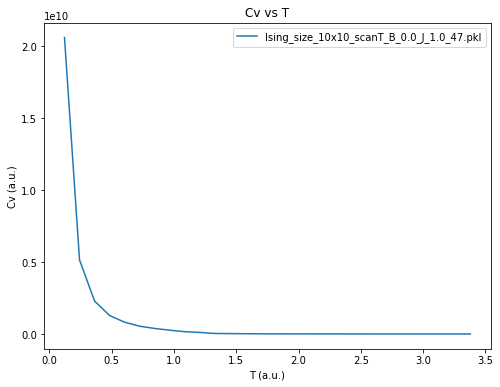

In [77]:
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][1:-1], data["Cv"][1:-1], label=filename_lst[ii])
name= data["param"]["scan_which"]
plt.xlabel(f"{name} (a.u.)")
plt.ylabel("Cv (a.u.)")
plt.title(f"Cv vs {name}")
plt.legend()
plt.show()

# Plots for the paper ver1



## Magnetization vs temperature

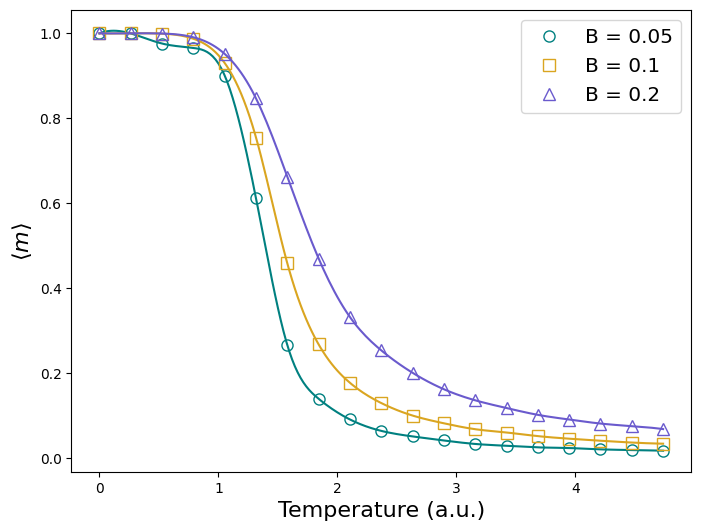

In [9]:
filename_lst =   [ 'Ising_size_500x500_scanT_B_0.05_J_1.0_54.pkl', 'Ising_size_500x500_scanT_B_0.1_J_1.0_55.pkl','Ising_size_500x500_scanT_B_0.2_J_1.0_66.pkl']#'Ising_size_500x500_scanT_B_0.5_J_1.0_53.pkl']
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)
# filename = "Ising_size_100x100_scanT_B_0.01_J_1.0_15.pkl"
# data = pickle.load(open(f"../Data/"+filename, "rb"))

B_Labels = ['B = 0.05','B = 0.1','B = 0.2']
marker_List = ['o','s','^']
color_List = [(0, 0.50196, 0.50196), (0.85490, 0.64706, 0.12549),(0.41569, 0.35294, 0.80392)]

smoothedPlot = True

plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][0:-1], data["avg_M"][0:-1],linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot)
    
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
name= data["param"]["scan_which"]
# plt.xlabel(f"{name} (a.u.)")
# plt.ylabel("avg_M (a.u.)")
# plt.title("Average Magnetism vs Temperature",fontsize=16)
plt.xlabel("Temperature (a.u.)", fontsize=16)
# plt.ylabel("<m>", fontsize=16)
plt.ylabel(r"$\langle m \rangle$", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingMagnetization.pdf')
plt.show()


## Heat capacity vs Temperature

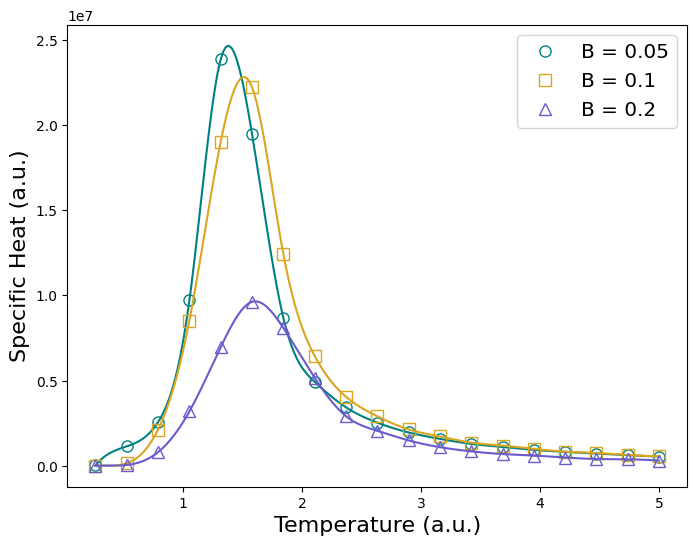

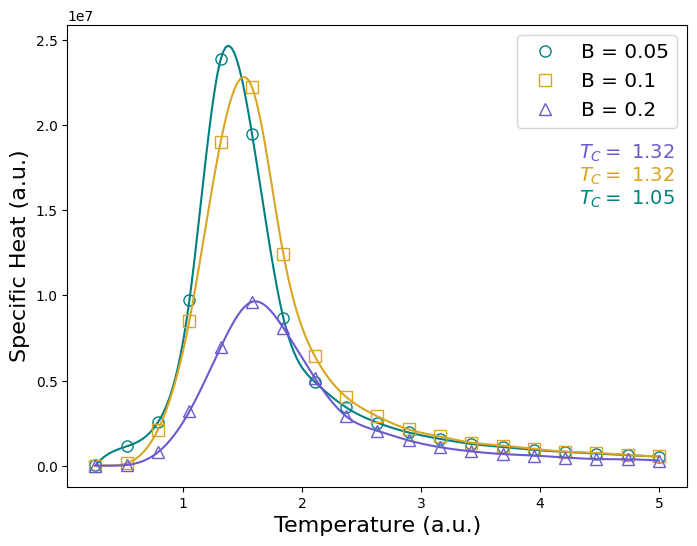

In [8]:
from scipy.interpolate import CubicSpline

filename_lst = [ 'Ising_size_500x500_scanT_B_0.05_J_1.0_54.pkl', 'Ising_size_500x500_scanT_B_0.1_J_1.0_55.pkl','Ising_size_500x500_scanT_B_0.2_J_1.0_66.pkl']#'Ising_size_500x500_scanT_B_0.5_J_1.0_53.pkl']
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)
# filename = "Ising_size_100x100_scanT_B_0.01_J_1.0_15.pkl"
# data = pickle.load(open(f"../Data/"+filename, "rb"))



B_Labels = ['B = 0.05','B = 0.1','B = 0.2']
marker_List = ['o','s','^']
color_List = [(0, 0.50196, 0.50196), (0.85490, 0.64706, 0.12549),(0.41569, 0.35294, 0.80392)]

smoothedPlot = True

plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][1:], np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2]),label=B_Labels[ii],marker = marker_List[ii], markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot)
    
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][1:], np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2]))
        expandedTSpace = np.linspace(min(data["param"]["scan"][1:]),max(data["param"]["scan"][1:]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
# plt.title("Specific Heat vs Temperature",fontsize=16)
plt.xlabel("Temperature (a.u.)", fontsize=16)
# plt.ylabel("<m>", fontsize=16)
plt.ylabel(r"Specific Heat (a.u.)", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingHeatCapacity.pdf')
plt.show();



### Plot with critical temperatures displayed
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    
    Cv =  np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2])
    plt.plot(data["param"]["scan"][1:],Cv,label=B_Labels[ii],marker = marker_List[ii], markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot)
    
    criticalTemp = data["param"]["scan"][np.argmax(Cv)] 
    plt.text(.98,.6+.05*ii,r"$T_C =$ %.2f" % (criticalTemp)    ,color=color_List[ii], fontsize=14, ha='right', va='bottom', transform=plt.gca().transAxes)  
    
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][1:], np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2]))
        expandedTSpace = np.linspace(min(data["param"]["scan"][1:]),max(data["param"]["scan"][1:]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
# plt.title("Specific Heat vs Temperature",fontsize=16)
plt.xlabel("Temperature (a.u.)", fontsize=16)
# plt.ylabel("<m>", fontsize=16)
plt.ylabel(r"Specific Heat (a.u.)", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingHeatCapacityLabeled.pdf')
plt.show();


## Log Fit around critical temperature

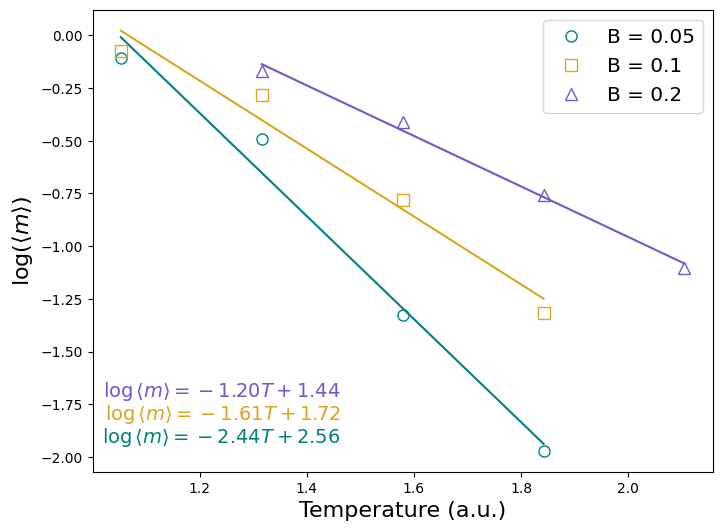

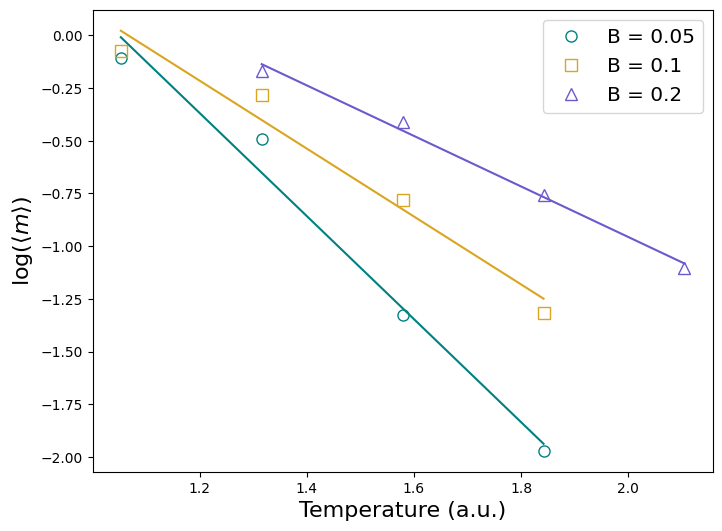

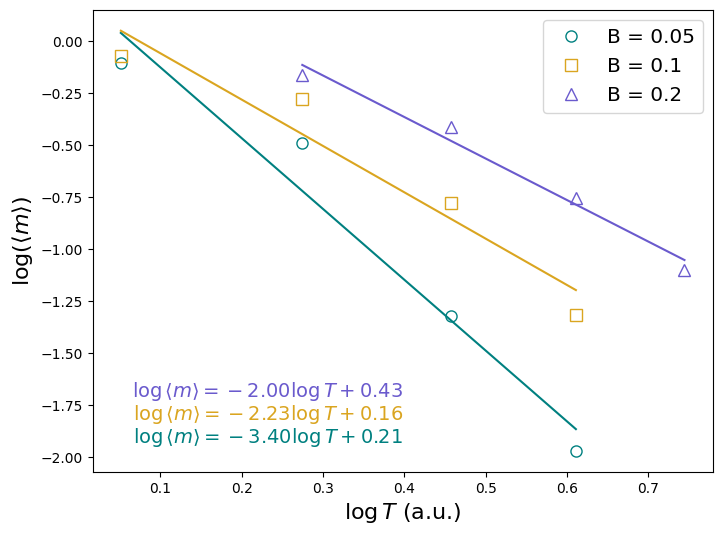

In [10]:
def find_nearest_index(arr, x):
    """
    Find the index of the element in the list 'arr' that is nearest in value to 'x'.
    """
    # Initialize variables to store the index and minimum difference
    nearest_index = None
    min_diff = float('inf')  # Initialize with positive infinity
    
    # Iterate through the list
    for i, num in enumerate(arr):
        # Calculate the absolute difference between the current element and 'x'
        diff = abs(num - x)
        
        # Update the index and minimum difference if the current difference is smaller
        if diff < min_diff:
            min_diff = diff
            nearest_index = i
    
    # Return the index of the nearest element
    return nearest_index



filename_lst = [ 'Ising_size_500x500_scanT_B_0.05_J_1.0_54.pkl', 'Ising_size_500x500_scanT_B_0.1_J_1.0_55.pkl','Ising_size_500x500_scanT_B_0.2_J_1.0_66.pkl']#'Ising_size_500x500_scanT_B_0.5_J_1.0_53.pkl']
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)
    
## Slice the relevant region of the data
## MUST DETERMINE slice range MANUALLY FOR EACH DATA SET
slice_Ranges = [[1,2],[1,2.2],[1.2,2.4]]

indexList = []
for i in range(len(data_lst)):
    indexList += [[find_nearest_index(data_lst[i]["param"]["scan"],slice_Ranges[i][0]),find_nearest_index(data_lst[i]["param"]["scan"],slice_Ranges[i][1])]]

    
B_Labels = ['B = 0.05','B = 0.1','B = 0.2']
marker_List = ['o','s','^']
color_List = [(0, 0.50196, 0.50196), (0.85490, 0.64706, 0.12549),(0.41569, 0.35294, 0.80392)]

smoothedPlot = False

linFit = True

plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]], np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]),linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot-2*linFit)
    
    ## Add a linear fit
    if linFit:
#         coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        linTspace = np.linspace(data["param"]["scan"][indexList[ii][0]],data["param"]["scan"][indexList[ii][1]-1],2)
        plt.plot(linTspace, coefficients[1]+coefficients[0]*linTspace,color=color_List[ii] )

#         plt.text( linTspace[-1]+.1, coefficients[1]+coefficients[0]*linTspace[-1], f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}' ,color=color_List[ii])
        plt.text( .4,.05+.05*ii, r'$\log\langle m \rangle = %.2fT + %.2f$' % (coefficients[0], coefficients[1])  ,color=color_List[ii], fontsize=14, ha='right', va='bottom', transform=plt.gca().transAxes)  
        
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
        
        

plt.xlabel("Temperature (a.u.)", fontsize=16)
plt.ylabel(r"$\log(\langle m \rangle)$", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingLogPlotLabeled.pdf')
plt.show()

plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]], np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]),linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot-2*linFit)
    
    ## Add a linear fit
    if linFit:
        coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        linTspace = np.linspace(data["param"]["scan"][indexList[ii][0]],data["param"]["scan"][indexList[ii][1]-1],2)
        plt.plot(linTspace, coefficients[1]+coefficients[0]*linTspace,color=color_List[ii] )

    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
        
        

plt.xlabel("Temperature (a.u.)", fontsize=16)
plt.ylabel(r"$\log(\langle m \rangle)$", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingLogPlot.pdf')
plt.show()



plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(np.log(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]]), np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]),linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot-2*linFit)
    
    ## Add a linear fit
    if linFit:
#         coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        coefficients = np.polyfit(np.log(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]]),  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        linTspace = np.linspace(np.log(data["param"]["scan"][indexList[ii][0]]),np.log(data["param"]["scan"][indexList[ii][1]-1]),2)
        plt.plot(linTspace, coefficients[1]+coefficients[0]*linTspace,color=color_List[ii] )

#         plt.text( linTspace[-1]+.1, coefficients[1]+coefficients[0]*linTspace[-1], f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}' ,color=color_List[ii])
        plt.text( .5,.05+.05*ii, r'$\log\langle m \rangle = %.2f \log T + %.2f$' % (coefficients[0], coefficients[1])  ,color=color_List[ii], fontsize=14, ha='right', va='bottom', transform=plt.gca().transAxes)  
        
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
        
        

plt.xlabel(r"$\log T$ (a.u.)", fontsize=16)
plt.ylabel(r"$\log(\langle m \rangle)$", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingLogLogPlotLabeled.pdf')
plt.show()


## Example spin maps

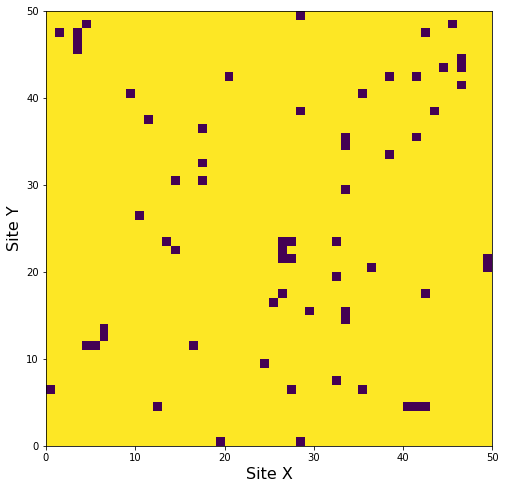

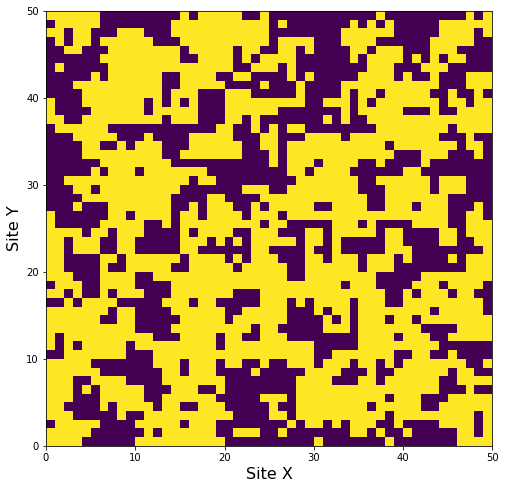

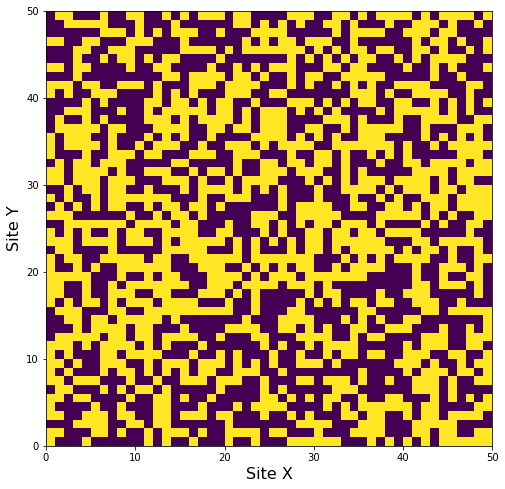

In [113]:

filename_lst = ['Ising_size_50x50_scanT_B_0.1_J_3.0_64.pkl']   # ['Ising_size_500x500_scanT_B_0.1_J_1.0_55.pkl']
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)
    
exp_interested = 0
data = data_lst[exp_interested]
filename = filename_lst[exp_interested]




## Polarized Example
interests = 8
plt.figure(figsize=(8, 8))
# We have # of trail returned final grids!!!
plt.pcolormesh(data["final_grid"][interests], cmap='viridis')  # [225:275,225:275]
plt.xlabel('Site X',fontsize=16)
plt.ylabel('Site Y',fontsize=16)
plt.savefig('ExampleGrid1B.pdf')
plt.show()


## Clumped Example
interests = 13
plt.figure(figsize=(8, 8))
# We have # of trail returned final grids!!!
plt.pcolormesh(data["final_grid"][interests], cmap='viridis')
plt.xlabel('Site X',fontsize=16)
plt.ylabel('Site Y',fontsize=16)
plt.savefig('ExampleGrid2B.pdf')
plt.show()


## Thermal Randomness Example
interests = -1
plt.figure(figsize=(8, 8))
grid = np.random.choice([-1, 1], size=(50, 50))
# We have # of trail returned final grids!!!
plt.pcolormesh(grid, cmap='viridis')
plt.xlabel('Site X',fontsize=16)
plt.ylabel('Site Y',fontsize=16)
plt.savefig('ExampleGrid3B.pdf')
plt.show()

In [202]:
dummy = [1,2,3,4,5,4]
np.argmax(dummy)

4

# Plot for the paper ver2


## Magnetization vs temperature

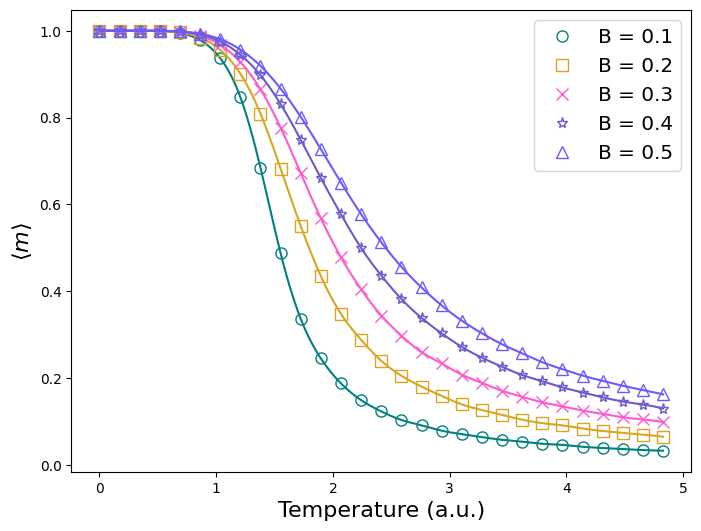

In [33]:
filename_lst = [ 'Ising_size_500x500_scanT_B_0.1_J_1.0_74.pkl', 'Ising_size_500x500_scanT_B_0.2_J_1.0_73.pkl','Ising_size_500x500_scanT_B_0.3_J_1.0_71.pkl', 'Ising_size_500x500_scanT_B_0.4_J_1.0_75.pkl', 'Ising_size_500x500_scanT_B_0.5_J_1.0_72.pkl']
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)

B_Labels = ['B = 0.1','B = 0.2','B = 0.3','B = 0.4','B = 0.5']
marker_List = ['o','s','x','*','^']
color_List = [(0, 0.50196, 0.50196), (0.85490, 0.64706, 0.12549), (1, 0.35294, 0.80392), (0.41569, 0.35294, 0.80392), (0.41569, 0.35294, 1)]

smoothedPlot = True
%matplotlib inline
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][0:-1], data["avg_M"][0:-1],linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot)
    
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
name= data["param"]["scan_which"]
# plt.xlabel(f"{name} (a.u.)")
# plt.ylabel("avg_M (a.u.)")
# plt.title("Average Magnetism vs Temperature",fontsize=16)
plt.xlabel("Temperature (a.u.)", fontsize=16)
# plt.ylabel("<m>", fontsize=16)
plt.ylabel(r"$\langle m \rangle$", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingMagnetization.pdf')
plt.show()

## Heat capacity vs Temperature

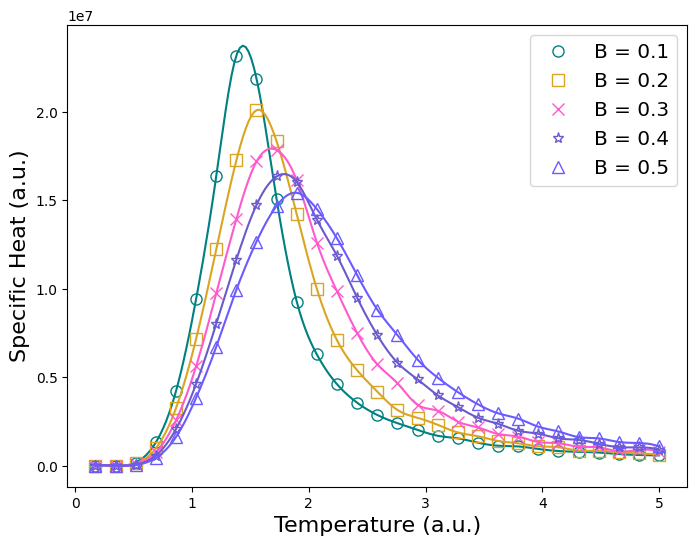

In [34]:
filename_lst = [ 'Ising_size_500x500_scanT_B_0.1_J_1.0_74.pkl', 'Ising_size_500x500_scanT_B_0.2_J_1.0_73.pkl','Ising_size_500x500_scanT_B_0.3_J_1.0_71.pkl', 'Ising_size_500x500_scanT_B_0.4_J_1.0_75.pkl', 'Ising_size_500x500_scanT_B_0.5_J_1.0_72.pkl']
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)

B_Labels = ['B = 0.1','B = 0.2','B = 0.3','B = 0.4','B = 0.5']
marker_List = ['o','s','x','*','^']
color_List = [(0, 0.50196, 0.50196), (0.85490, 0.64706, 0.12549), (1, 0.35294, 0.80392), (0.41569, 0.35294, 0.80392), (0.41569, 0.35294, 1)]

smoothedPlot = True
%matplotlib inline
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][1:], np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2]),label=B_Labels[ii],marker = marker_List[ii], markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot)
    
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][1:], np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2]))
        expandedTSpace = np.linspace(min(data["param"]["scan"][1:]),max(data["param"]["scan"][1:]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
# plt.title("Specific Heat vs Temperature",fontsize=16)
plt.xlabel("Temperature (a.u.)", fontsize=16)
# plt.ylabel("<m>", fontsize=16)
plt.ylabel(r"Specific Heat (a.u.)", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingHeatCapacity.pdf')
plt.show();

### Plot with critical temperatures displayed

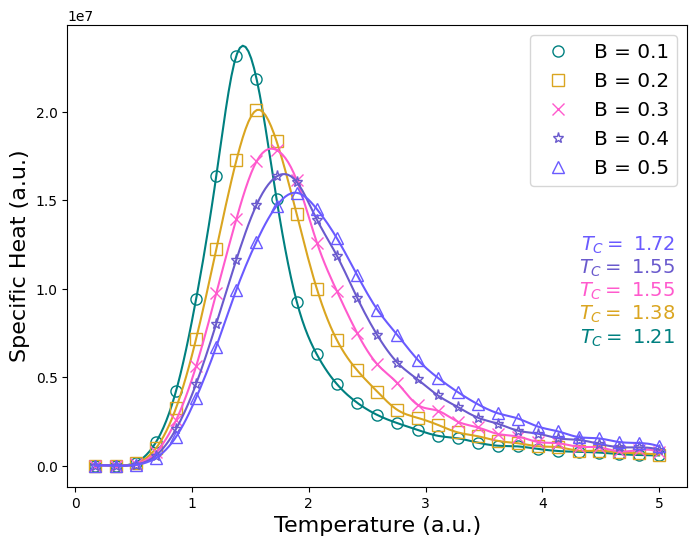

In [35]:
%matplotlib inline
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    
    Cv =  np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2])
    plt.plot(data["param"]["scan"][1:],Cv,label=B_Labels[ii],marker = marker_List[ii], markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot)
    
    criticalTemp = data["param"]["scan"][np.argmax(Cv)] 
    plt.text(.98,.3+.05*ii,r"$T_C =$ %.2f" % (criticalTemp),color=color_List[ii], fontsize=14, ha='right', va='bottom', transform=plt.gca().transAxes)  
    
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][1:], np.diff(data["avg_E"])/(data["param"]["scan"][1]-data["param"]["scan"][2]))
        expandedTSpace = np.linspace(min(data["param"]["scan"][1:]),max(data["param"]["scan"][1:]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
# plt.title("Specific Heat vs Temperature",fontsize=16)
plt.xlabel("Temperature (a.u.)", fontsize=16)
# plt.ylabel("<m>", fontsize=16)
plt.ylabel(r"Specific Heat (a.u.)", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingHeatCapacityLabeled.pdf')
plt.show()

Log Fit around critical temperature

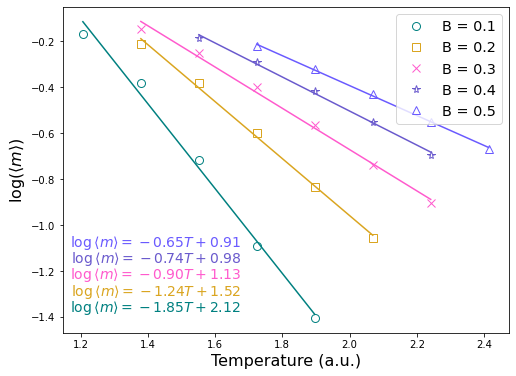

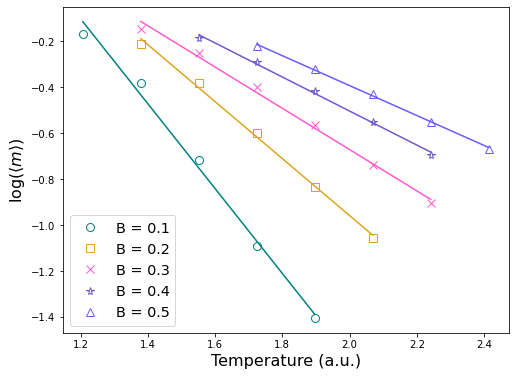

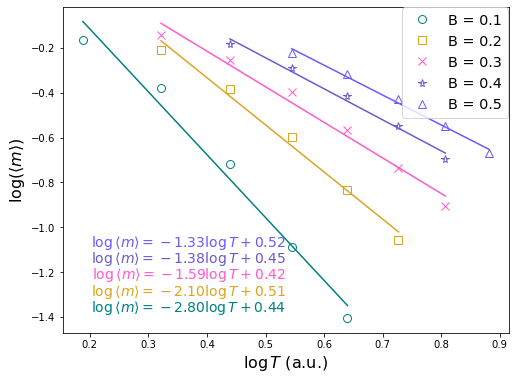

In [13]:
def find_nearest_index(arr, x):
    """
    Find the index of the element in the list 'arr' that is nearest in value to 'x'.
    """
    # Initialize variables to store the index and minimum difference
    nearest_index = None
    min_diff = float('inf')  # Initialize with positive infinity
    
    # Iterate through the list
    for i, num in enumerate(arr):
        # Calculate the absolute difference between the current element and 'x'
        diff = abs(num - x)
        
        # Update the index and minimum difference if the current difference is smaller
        if diff < min_diff:
            min_diff = diff
            nearest_index = i
    
    # Return the index of the nearest element
    return nearest_index

filename_lst = [ 'Ising_size_500x500_scanT_B_0.1_J_1.0_74.pkl', 'Ising_size_500x500_scanT_B_0.2_J_1.0_73.pkl','Ising_size_500x500_scanT_B_0.3_J_1.0_71.pkl', 'Ising_size_500x500_scanT_B_0.4_J_1.0_75.pkl', 'Ising_size_500x500_scanT_B_0.5_J_1.0_72.pkl']
data_lst = []
for filename in filename_lst:
    data = pickle.load(open(f"../Data/"+filename, "rb"))
    data_lst.append(data)

B_Labels = ['B = 0.1','B = 0.2','B = 0.3','B = 0.4','B = 0.5']
marker_List = ['o','s','x','*','^']
color_List = [(0, 0.50196, 0.50196), (0.85490, 0.64706, 0.12549), (1, 0.35294, 0.80392), (0.41569, 0.35294, 0.80392), (0.41569, 0.35294, 1)]

## Slice the relevant region of the data
## MUST DETERMINE slice range MANUALLY FOR EACH DATA SET
slice_Ranges = [[1.15,2],[1.325,2.25],[1.3,2.5],[1.51,2.5],[1.66,2.6]]

indexList = []
for i in range(len(data_lst)):
    indexList += [[find_nearest_index(data_lst[i]["param"]["scan"],slice_Ranges[i][0]),find_nearest_index(data_lst[i]["param"]["scan"],slice_Ranges[i][1])]]

smoothedPlot = False

linFit = True
%matplotlib inline
plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]], np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]),linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot-2*linFit)
    
    ## Add a linear fit
    if linFit:
#         coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        linTspace = np.linspace(data["param"]["scan"][indexList[ii][0]],data["param"]["scan"][indexList[ii][1]-1],2)
        plt.plot(linTspace, coefficients[1]+coefficients[0]*linTspace,color=color_List[ii] )

#         plt.text( linTspace[-1]+.1, coefficients[1]+coefficients[0]*linTspace[-1], f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}' ,color=color_List[ii])
        plt.text( .4,.05+.05*ii, r'$\log\langle m \rangle = %.2fT + %.2f$' % (coefficients[0], coefficients[1])  ,color=color_List[ii], fontsize=14, ha='right', va='bottom', transform=plt.gca().transAxes)  
        
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
        
        

plt.xlabel("Temperature (a.u.)", fontsize=16)
plt.ylabel(r"$\log(\langle m \rangle)$", fontsize=16)
plt.legend(fontsize='x-large',loc='upper right')
plt.savefig('IsingLogPlotLabeled.pdf')
plt.show()

plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]], np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]),linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot-2*linFit)
    
    ## Add a linear fit
    if linFit:
        coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        linTspace = np.linspace(data["param"]["scan"][indexList[ii][0]],data["param"]["scan"][indexList[ii][1]-1],2)
        plt.plot(linTspace, coefficients[1]+coefficients[0]*linTspace,color=color_List[ii] )

    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )

plt.xlabel("Temperature (a.u.)", fontsize=16)
plt.ylabel(r"$\log(\langle m \rangle)$", fontsize=16)
plt.legend(fontsize='x-large')
plt.savefig('IsingLogPlot.pdf')
plt.show()

plt.figure(figsize=(8, 6))
for ii, data in enumerate(data_lst):
    plt.plot(np.log(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]]), np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]),linestyle ='-', label=B_Labels[ii],marker = marker_List[ii],  markerfacecolor='none', fillstyle='none', markersize=8,color=color_List[ii],linewidth=2-2*smoothedPlot-2*linFit)
    
    ## Add a linear fit
    if linFit:
#         coefficients = np.polyfit(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]],  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        coefficients = np.polyfit(np.log(data["param"]["scan"][indexList[ii][0]:indexList[ii][1]]),  np.log(data["avg_M"][indexList[ii][0]:indexList[ii][1]]), 1)  
        linTspace = np.linspace(np.log(data["param"]["scan"][indexList[ii][0]]),np.log(data["param"]["scan"][indexList[ii][1]-1]),2)
        plt.plot(linTspace, coefficients[1]+coefficients[0]*linTspace,color=color_List[ii] )

#         plt.text( linTspace[-1]+.1, coefficients[1]+coefficients[0]*linTspace[-1], f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}' ,color=color_List[ii])
        plt.text( .5,.05+.05*ii, r'$\log\langle m \rangle = %.2f \log T + %.2f$' % (coefficients[0], coefficients[1])  ,color=color_List[ii], fontsize=14, ha='right', va='bottom', transform=plt.gca().transAxes)  
        
    ## Make a smoothed curve with the data
    if smoothedPlot:
        cs = CubicSpline(data["param"]["scan"][0:-1],data["avg_M"][0:-1])
        expandedTSpace = np.linspace(min(data["param"]["scan"][0:-1]),max(data["param"]["scan"][0:-1]),200)
        plt.plot(expandedTSpace, cs(expandedTSpace),color=color_List[ii] )
        
        

plt.xlabel(r"$\log T$ (a.u.)", fontsize=16)
plt.ylabel(r"$\log(\langle m \rangle)$", fontsize=16)
plt.legend(fontsize='x-large',loc=(0.76,0.66))
plt.savefig('IsingLogLogPlotLabeled.pdf')
plt.show()
